# A quick example of the risk-reward trade off that DOL captures.

First a couple of set up things:


In [7]:
# these are just to tell python what parts of it we want to use:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# and this sets the width of the window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Now lets collect some data:

1. What data do we need?
    - __SALES VOLUME DATA__
2. Where could we get this data from?
    - Emma's records
    - Ask others
    - Ask the vendor 

In [8]:
np.random.seed(10)
size=52*3 # three years of data

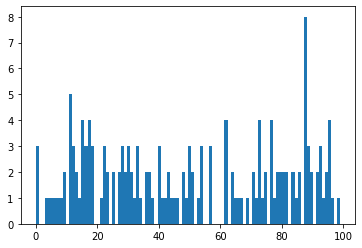

In [9]:
# sales volume 
rel_range = range(0,100)
volume = np.random.choice(rel_range, size=size) 
p=plt.hist(volume, bins = len(rel_range))

In [10]:
# revenue
R_u = 200
R = volume * R_u
R

array([ 1800,  3000, 12800,  5600, 17800, 18600,  5800,  1600, 14600,
           0,  8000,  7200,  3200,  2200, 10800, 17600, 12400,  6600,
       14400, 15600,  9800, 10200, 10800, 15400, 13800,  2600,  5000,
        2600, 18400, 17200,  6000,  6000, 17800,  2400, 13000,  6200,
       11400,  7200,  5400,  3600, 18600, 15400,  4400,  4600, 18800,
        2200,  5600, 14800, 17600,  1800,  3000,  3600, 16000, 14200,
       17600,  2200,  3400,  9200,  1400, 15000,  5600,  6600, 16800,
       19200, 17600,  8800,  1000,   800, 14200, 17600, 17600, 10000,
       10800,  6800,  3000, 15400, 17600,  3000,  1200, 17000,  4400,
        2200,  2400, 18400, 19200, 12400, 11400, 15800,  8400, 11400,
       19400, 10000,  9000,  8000, 17800, 14600,  7400,     0,  3600,
        4600,   600,  5800,  3200, 16800, 16400,  2800, 10200, 15800,
        3400, 10000, 10600,  5000,  9600,  3400,  6400, 16200, 16000,
        8200, 18000,  2400,  6000, 16200,  3400,  3200,     0,  6200,
       14600, 12800,

In [11]:
# contribution margin
CM_u = [80,50,30]

In [13]:
CM1 = volume * CM_u[0]
CM2 = volume * CM_u[1]
CM3 = volume * CM_u[2]

In [16]:
# FC & OI
FC = [2000,800,0]

In [17]:
OI1 = CM1 - FC[0]
OI2 = CM2 - FC[1]
OI3 = CM3 - FC[2]

In [18]:
# put the volumes and oi's into a frame
col_dict =  {
            "volume":volume, 
            "OI1":OI1,
            "OI2":OI2,
            "OI3":OI3,
            }

In [19]:
OI_data = pd.DataFrame(col_dict, columns=list(col_dict.keys()))

In [20]:
OI1

array([-1280,  -800,  3120,   240,  5120,  5440,   320, -1360,  3840,
       -2000,  1200,   880,  -720, -1120,  2320,  5040,  2960,   640,
        3760,  4240,  1920,  2080,  2320,  4160,  3520,  -960,     0,
        -960,  5360,  4880,   400,   400,  5120, -1040,  3200,   480,
        2560,   880,   160,  -560,  5440,  4160,  -240,  -160,  5520,
       -1120,   240,  3920,  5040, -1280,  -800,  -560,  4400,  3680,
        5040, -1120,  -640,  1680, -1440,  4000,   240,   640,  4720,
        5680,  5040,  1520, -1600, -1680,  3680,  5040,  5040,  2000,
        2320,   720,  -800,  4160,  5040,  -800, -1520,  4800,  -240,
       -1120, -1040,  5360,  5680,  2960,  2560,  4320,  1360,  2560,
        5760,  2000,  1600,  1200,  5120,  3840,   960, -2000,  -560,
        -160, -1760,   320,  -720,  4720,  4560,  -880,  2080,  4320,
        -640,  2000,  2240,     0,  1840,  -640,   560,  4480,  4400,
        1280,  5200, -1040,   400,  4480,  -640,  -720, -2000,   480,
        3840,  3120,

In [21]:
OI_data

,volume,OI1,OI2,OI3
0,9,-1280,-350,270
1,15,-800,-50,450
2,64,3120,2400,1920
3,28,240,600,840
4,89,5120,3650,2670
...,...,...,...,...
151,96,5680,4000,2880
152,73,3840,2850,2190
153,40,1200,1200,1200
154,43,1440,1350,1290


In [22]:
OI_data.describe()

,volume,OI1,OI2,OI3
count,156.000000,156.000000,156.000000,156.000000
mean,50.032051,2002.564103,1701.602564,1500.961538
std,30.164799,2413.183915,1508.239947,904.943968
min,0.000000,-2000.000000,-800.000000,0.000000
25%,22.000000,-240.000000,300.000000,660.000000
50%,48.500000,1880.000000,1625.000000,1455.000000
75%,79.000000,4320.000000,3150.000000,2370.000000
max,99.000000,5920.000000,4150.000000,2970.000000


In [25]:
loss=[
    len(OI_data[OI_data['OI1']<0]),
    len(OI_data[OI_data['OI2']<0]),
    len(OI_data[OI_data['OI3']<0])
]
loss

[42, 26, 0]

In [26]:
prLoss = [x/size for x in loss]
prLoss

[0.2692307692307692, 0.16666666666666666, 0.0]

# Now lets plot the data:

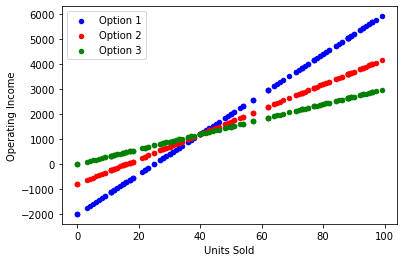

In [27]:
ax = OI_data.plot(kind="scatter", x="volume",y="OI1", color="b", label="Option 1")
OI_data.plot(kind="scatter", x="volume",y="OI2", color="r", label="Option 2", ax=ax)
OI_data.plot(kind="scatter", x="volume",y="OI3", color="g", label="Option 3", ax=ax)

ax.set_xlabel("Units Sold")
ax.set_ylabel("Operating Income")
plt.show()